In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras  
from tensorflow.keras import layers, datasets, models

11493376/11490434 [==============================] - 0s 0us/step
5
shape of train_images: (60000, 28, 28)
shape of train_labels: (60000,)


10000

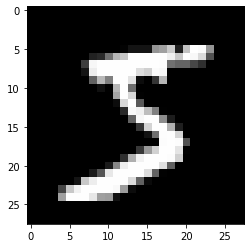

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")
train_images, test_images = train_images / 255.0, test_images / 255.0
print('shape of train_images:', train_images.shape)
print('shape of train_labels:', train_labels.shape)
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

5


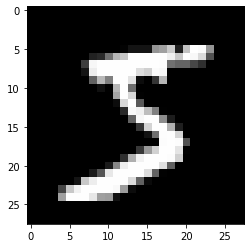

In [31]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(10000)

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

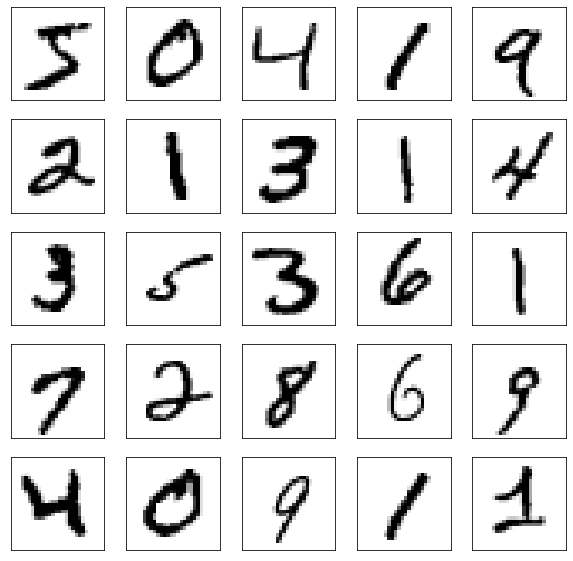

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

In [32]:
train_steps = 2500
model = models.Sequential()
model.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 32)          0         
Total params: 13,248
Trainable params: 13,248
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.add(layers.Flatten())
model.add(layers.Dense(7*7*32, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1568)              804384    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [35]:
for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        xent = loss_fn(lbl_batch, logits)

    grads = tape.gradient(xent, model.trainable_weights)
    opt.apply_gradients(zip(grads, model.trainable_weights))
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.302035093307495 Accuracy: 0.1328125
Loss: 0.07871030271053314 Accuracy: 0.9765625
Loss: 0.10779814422130585 Accuracy: 0.953125
Loss: 0.10455844551324844 Accuracy: 0.9609375
Loss: 0.008930628187954426 Accuracy: 1.0
Loss: 0.08213179558515549 Accuracy: 0.9765625
Loss: 0.06401441991329193 Accuracy: 0.984375
Loss: 0.051690034568309784 Accuracy: 0.984375
Loss: 0.035186633467674255 Accuracy: 0.9921875
Loss: 0.04291872680187225 Accuracy: 0.984375
Loss: 0.06245729327201843 Accuracy: 0.9921875
Loss: 0.004019503016024828 Accuracy: 1.0
Loss: 0.006412383634597063 Accuracy: 1.0
Loss: 0.0037880411837249994 Accuracy: 1.0
Loss: 0.01095036044716835 Accuracy: 0.9921875
Loss: 0.03594974800944328 Accuracy: 0.9765625
Loss: 0.011497056111693382 Accuracy: 1.0
Loss: 0.04030540958046913 Accuracy: 0.9921875
Loss: 0.0033969038631767035 Accuracy: 1.0
Loss: 0.002480153227224946 Accuracy: 1.0
Loss: 0.023582572117447853 Accuracy: 0.9921875
Loss: 0.020508818328380585 Accuracy: 0.9921875
Loss: 0.036176871508359

In [36]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
        train_acc_metric.reset_states()
    

Loss: 0.010142777115106583 Accuracy: 1.0
Loss: 0.0005746494280174375 Accuracy: 0.9971093535423279
Loss: 0.047608617693185806 Accuracy: 0.9940624833106995
Loss: 0.026906317099928856 Accuracy: 0.9956250190734863
Loss: 0.03024456277489662 Accuracy: 0.9954687356948853
Loss: 0.011003782041370869 Accuracy: 0.996005654335022
Loss: 0.00290889386087656 Accuracy: 0.998046875
Loss: 0.0004578734515234828 Accuracy: 0.99609375
Loss: 0.017715612426400185 Accuracy: 0.996874988079071
Loss: 0.007827536202967167 Accuracy: 0.9953906536102295
Loss: 0.00012153452553320676 Accuracy: 0.9967888593673706
Loss: 0.022698158398270607 Accuracy: 0.9958593845367432
Loss: 0.01847079023718834 Accuracy: 0.9958593845367432
Loss: 0.047254305332899094 Accuracy: 0.9966406226158142
Loss: 0.0030843084678053856 Accuracy: 0.99609375
Loss: 0.026649314910173416 Accuracy: 0.9980419874191284
Loss: 0.001841343124397099 Accuracy: 0.9979687333106995
Loss: 0.021063344553112984 Accuracy: 0.9967968463897705
Loss: 0.0025885780341923237 Ac

In [0]:
# this is very convenient -- before, we usually had code that
# evaluates the whole test set at once -- this won't work for
# large datasets/models. With metrics, we can just iterate
# over the data and the metric takes care of averaging etc.

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9803000092506409


In [0]:
from google.colab import drive
drive.mount('/content/drive')

# New Section